In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


#Exploratory Data Analysis(EDA)

In [7]:
category = df['Category'].value_counts().reset_index()
category

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


#Plotting data

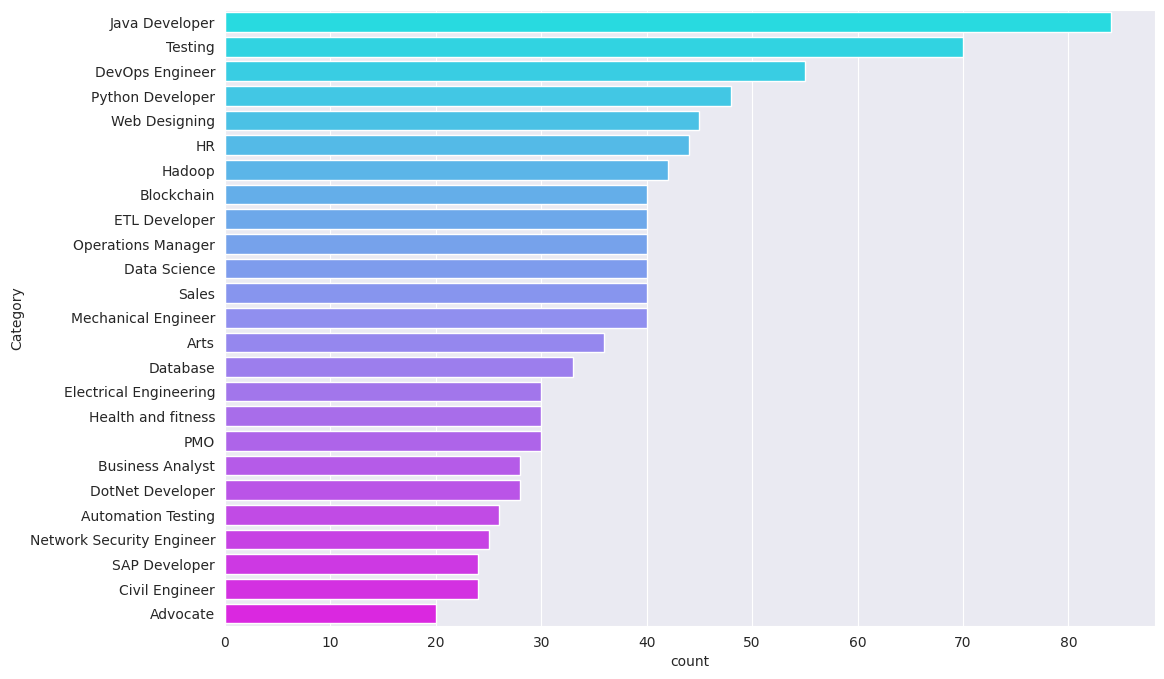

In [8]:
plt.figure(figsize=(12,8))
sns.barplot(x=category['count'], y=category['Category'],palette='cool')
plt.show()

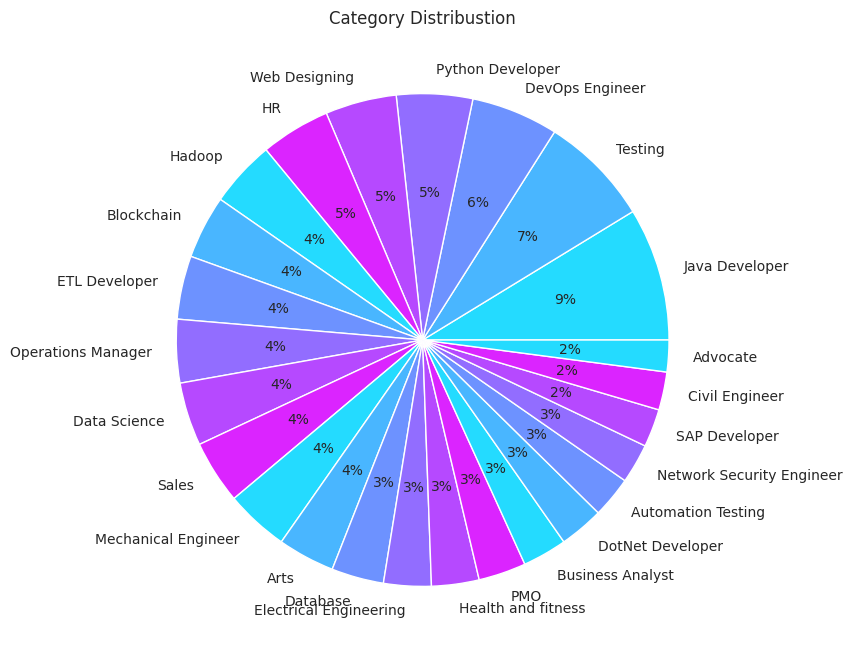

In [9]:
plt.figure(figsize=(12,8))
plt.pie(category['count'],labels=category['Category'],colors=sns.color_palette("cool"),autopct='%.0f%%')
plt.title('Category Distribustion')
plt.show()

#Data Pre-Processing

Data cleaning ,
Data Encoding



In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [11]:
def clean_resume(resumeText):
  resumeText=re.sub('http\S+\s*',' ',resumeText) #url_removal
  resumeText=re.sub('RT|cc',' ',resumeText)  #RT_cc removal
  resumeText=re.sub('#\S+'," ",resumeText)  #hashtag_removal
  resumeText=re.sub('@\S+',' ',resumeText)  #mention_removal
  resumeText=re.sub('[%s]'% re.escape("""!"#$%&'()*+,-./:;<=>?@[\]_^_{|}~"""),' ',resumeText) #punctuation_removal
  resumeText=re.sub(r'[^\x00-\x7f]',r' ',resumeText)
  resumeText=re.sub('\s+'," ",resumeText)  #extra_whitespace removal
  return resumeText

In [12]:
df['cleaned'] = df['Resume'].apply(lambda x:clean_resume(x))
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [13]:
#Getting the entire resume text

In [14]:
corpus=' '
for i in range(0,len(df)):
  corpus=corpus+df["cleaned"][i]


In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Tokenizing the Text

In [16]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(corpus)
len(tokens)


411913

In [17]:
#converting to lower case

words=[]
for word in tokens:
  words.append(word.lower())
words[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [18]:
#Encoding Data

label = LabelEncoder()
df['new_caregory'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned,new_caregory
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


(array([ 82.,  68.,  97.,  83.,  70., 116., 124.,  95.,  72., 155.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

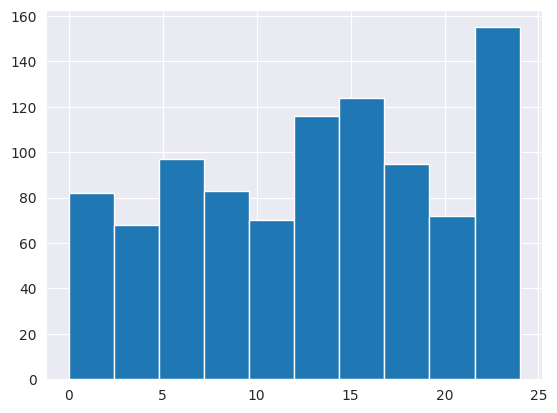

In [19]:
plt.hist(df['new_caregory'])

#Vectorizing Clean Columns

In [20]:
text = df['cleaned'].values
target = df['new_caregory'].values
word_vectorizer = TfidfVectorizer(sublinear_tf=True,
                                  stop_words='english',
                                  max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)


In [21]:
WordFeatures.shape

(962, 1500)

#Train Test Data and Modeling

In [22]:
#seperate train and test data
X_train,X_test,Y_train,Y_test = train_test_split(WordFeatures,target,random_state=24,test_size=0.2)

In [23]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((769, 1500), (193, 1500), (769,), (193,))

In [24]:
#Model_Training

In [25]:
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train,Y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [26]:
#Prediction

In [27]:
Y_pred = model.predict(X_test)

In [28]:
print(f'--------------------------\n| Training Accuracy: {round(model.score(X_train, Y_train) * 100, 2)}% |')
print(f'--------------------------\n| Validation Accuracy: {round(model.score(X_test, Y_test) * 100, 2)}% |')


--------------------------
| Training Accuracy: 98.96% |
--------------------------
| Validation Accuracy: 96.89% |


In [29]:
print(metrics.classification_report(Y_test,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

#To learn the Top keywords to Analyze

In [30]:
#English stopwords from nltk

In [31]:
stopwords = nltk.corpus.stopwords.words('english')
new_words = []

In [32]:
#removing stopwords from words and append to new_words from words

for word in words:
  if word not in stopwords:
    new_words.append(word)

In [33]:
new_words[0:10]

['skills',
 'programming',
 'languages',
 'python',
 'pandas',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib']

In [34]:
#Lemmatization

In [41]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wn = WordNetLemmatizer()
lem_words =[]

for word in new_words:
  word = wn.lemmatize(word)
  lem_words.append(word)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
lem_words[0:10]

['skill',
 'programming',
 'language',
 'python',
 'panda',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib']

In [43]:
len(lem_words)

318305

In [49]:
#finding no. of words lemmatized and not

same=0
diff=0

for i in range (0,len(lem_words)):
  if lem_words[i]==new_words[i]:
    same=same+1
  elif lem_words[i]!=new_words[i]:
      diff=diff+1

print("No.of words Lemmatized = ", diff)
print("No. of words not Lemmatized =  ", same)

No.of words Lemmatized =  49591
No. of words not Lemmatized =   268714


In [50]:
#Frequency Distribution of the Words

freq_dist = nltk.FreqDist(lem_words)


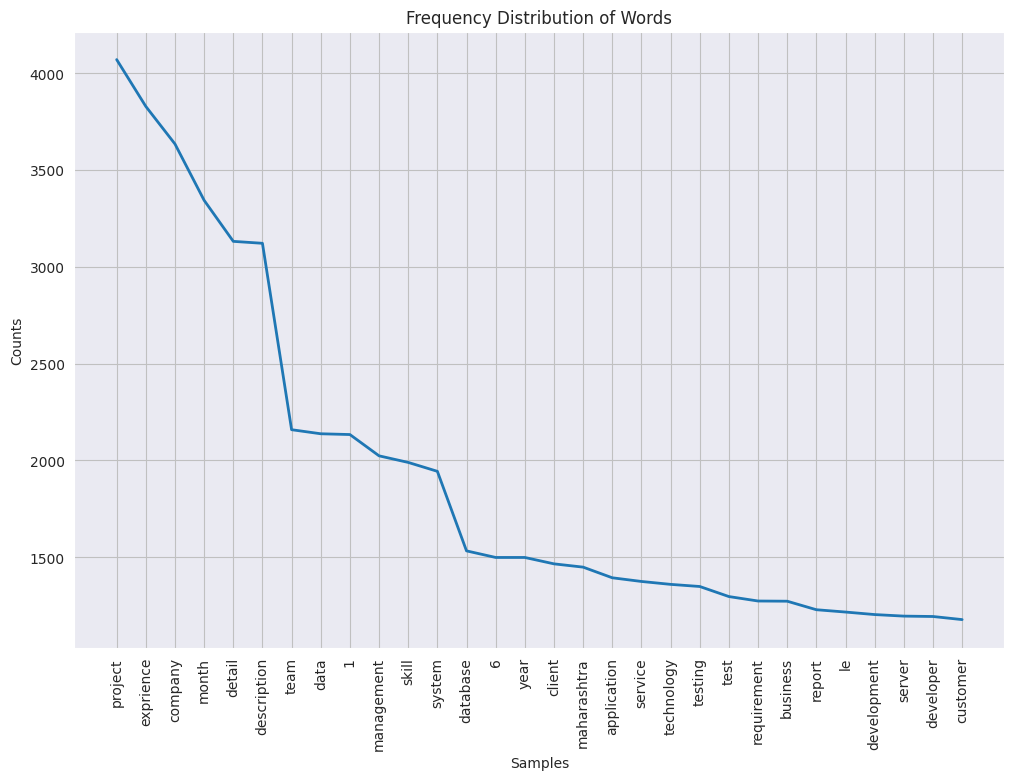

<Axes: title={'center': 'Frequency Distribution of Words'}, xlabel='Samples', ylabel='Counts'>

In [52]:
#Plotting Frequency Distribution Plot

plt.subplots(figsize=(12,8))
plt.title("Frequency Distribution of Words")
freq_dist.plot(30)

In [57]:
#Generate WordCLoud
res =' '.join([i for i in lem_words if not i.isdigit()])


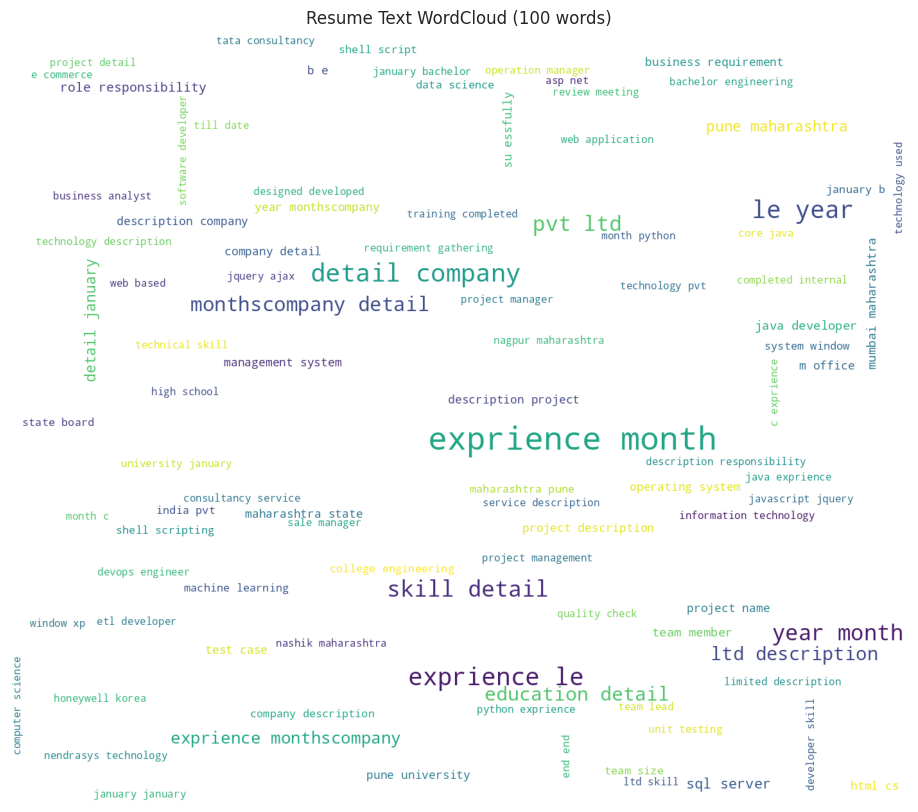

In [59]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color='white',
                      width=1400,
                      height=1200,
                      ).generate(res)

plt.imshow(wordcloud)
plt.title("Resume Text WordCloud (100 words)")
plt.axis('off')
plt.show()